In [18]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
    features = model.predict(img_data)
    return features.flatten()

def load_images_and_extract_features(image_folder, model):
    features = []
    filenames = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            feature = extract_features(image_path, model)
            features.append(feature)
            filenames.append(image_path)
    return features, filenames

image_folder = 'fotoSaya'
features, filenames = load_images_and_extract_features(image_folder, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [19]:
import pickle

with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)
    
with open('filenames.pkl', 'wb') as f:
    pickle.dump(filenames, f)


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

def search_similar_images(query_image_path, model, top_n=5):
    query_feature = extract_features(query_image_path, model)
    
    similarities = cosine_similarity([query_feature], features)
    sorted_indices = similarities[0].argsort()[::-1][:top_n]
    
    similar_images = [filenames[idx] for idx in sorted_indices]
    return similar_images

query_image_path = 'fotoSaya/foto1.jpg'
similar_images = search_similar_images(query_image_path, model)

for img in similar_images:
    print(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
fotoSaya\foto1.jpg


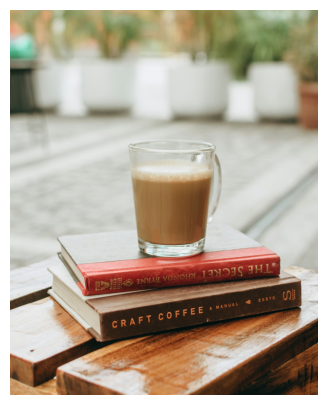

In [21]:
import matplotlib.pyplot as plt
import cv2

img_path = 'fotoSaya/foto1.jpg'

def show_images(images):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    
    if num_images == 1:
        axes = [axes]
    
    for ax, img_path in zip(axes, images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()

# Misalnya, jika 'similar_images' berisi daftar jalur gambar
similar_images = [img_path]  # Ganti dengan daftar jalur gambar Anda
show_images(similar_images)


In [22]:
import streamlit as st

st.title("Sistem Pendeteksi Objek dalam Gambar Menggunakan CBIR")
uploaded_file = st.file_uploader("Unggah gambar", type=["jpg", "png"])

if uploaded_file is not None:
    with open("temp.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())
    st.image("temp.jpg", caption="Gambar Query", use_column_width=True)
    similar_images = search_similar_images("temp.jpg", model)
    st.write("Hasil Pencarian:")
    show_images(similar_images)


2024-07-02 15:41:05.661 
  command:

    streamlit run C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
